# Exercise Solutions - Day 5
*August 5, 2024*

*I School Python Bootcamp*

*Author: Lauren Chambers*

## Lab 5A - Drawing with `drawsvg`

### Exercise  1
Figure out how to draw a triangle using `drawsvg`

In [4]:
import drawsvg as draw

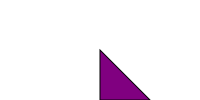

In [6]:
# Initialize
d = draw.Drawing(200, 100, origin='center')

# Draw a triangle
triangle = draw.Lines(0, 0, # starting X, Y vertex
                      0, 50, # move down 50 pixels
                      50, 50, # move right 50 pixels
                      0,0, # move back to the origin
                    close=True,
            fill='purple',
            stroke='black')
d.append(triangle)

# Display
d

### Exercise  2
*Part 1*

Why does the below code throw an error?

In [39]:
# Initialize
d = draw.Drawing(width=400, height=200, origin='lower-left')

# Draw a circle
circle = draw.Circle(200, -100, 30, fill='red')
d.append(circle)

# Display
d

KeyError: 'lower-left'

*Answer:* As shown in the traceback, the problem is in line 2 where we are initializing the drawing. By looking to the error message (`KeyError: 'lower-left'`) and reading through the package code for the definiion of the `Drawing()` function, we can see that the function expects certain strings to place the origin, but 'lower-left' is not one of them. Replacing 'lower-left' with 'bottom-left' would resolve this error.

*Part 2*

What about this code?

In [17]:
# Initialize
d = draw.Drawing(width=400, height=200, origin='bottom-left')

# Draw two circles
circle1 = draw.Circle(100, -100, 30, fill='red')
circle2 = draw.Circle(300, -100, 30, fill='blue')
d.append(circle1).append(circle2)

# Display
d

AttributeError: 'NoneType' object has no attribute 'append'

*Answer:* As shown in the traceback, the problem is in line 7 where we are adding our circles the drawing. By looking to the error message we see that one of the `append()` functions is causing problems. Indeed, you cannot chain `append()` like this! Splitting up the chain and appending each circle individual resolves this error:
```python
d.append(circle1)
d.append(circle2)
```

### Exercise  3 
Go to drawsvg documentation page (https://cduck.github.io/drawsvg/) and find a new feature; use it to create a new drawing!

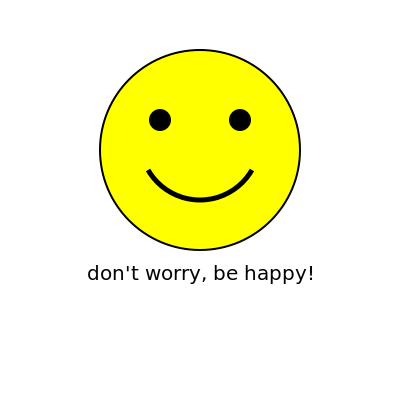

In [22]:
# Initialize
d = draw.Drawing(400, 400, origin='center')

# Make the face
circle = draw.Circle(0, -50, 100, fill='yellow', stroke_width=2, stroke='black')
d.append(circle)

# Add the eyes
left_eye = draw.Circle(cx=-40, cy=-80, r=10, fill='black', stroke_width=2, stroke='black')
right_eye = draw.Circle(cx=40, cy=-80, r=10, fill='black', stroke_width=2, stroke='black')
d.append(left_eye)
d.append(right_eye)

# Add the smile!
smile = draw.ArcLine(cx=0, cy=-60, r=60, start_deg=210, end_deg=330,
        stroke='black', stroke_width=5, fill='none', fill_opacity=0.2)
d.append(smile)

# Add a message!
msg = draw.Text("don't worry, be happy!", font_size=20, x=0, y=80, text_anchor='middle')
d.append(msg)

# Display
d

### Exercise  4
Create an animation that makes a circle that grows bigger. Use the below code as a starting point

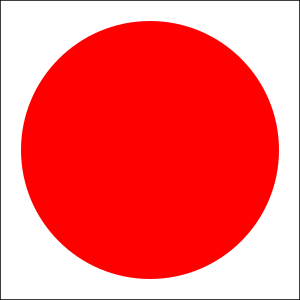

In [24]:
# Define the animation function
def drawing_func(frame, n_frames):
    d = draw.Drawing(width=200, height=200, origin='center')
    d.append(draw.Rectangle(x=-100, y=-100, width=200, height=200, fill="white", stroke="black"))
    d.set_render_size(h=300)
    
    # Calculate the RADIUS of the ball in each frame
    r = frame / n_frames * 80 + 10 
    ball = draw.Circle(0, 0, r, fill='red')
    d.append(ball)
    
    return d

# Display the animation using frame_animate_jupyter()
reps = 5
n_frames = 20
with draw.frame_animate_jupyter(drawing_func, delay=0.05) as anim:
    for r in range(reps):
        for i in range(n_frames):
            # Add each frame to the animation
            anim.draw_frame(i, n_frames)

## Lab 5B - Plotting with `matplotlib`

In [30]:
import matplotlib.pyplot as plt

### Exercise  1

Create a simple line plot from scratch. Plot the following data points:

```python
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]
```

Add labels for the x-axis and y-axis, and add a title to the plot.

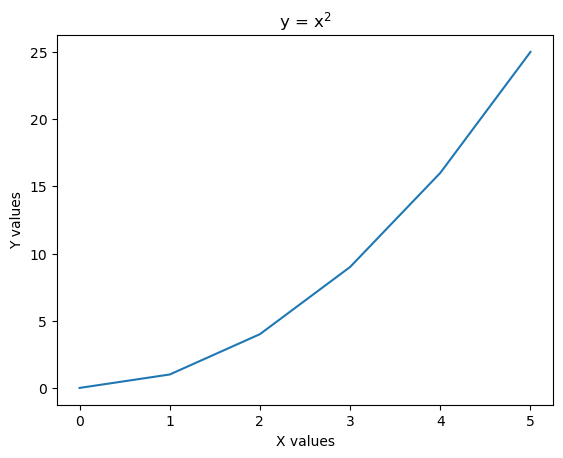

In [32]:
# Initialize
plt.figure()

x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

# Draw plot and axis labels
plt.plot(x, y)
plt.ylabel("Y values")
plt.xlabel("X values")
plt.title(r"y = x$^2$")

# Display
plt.show()

### Exercise  2

Create a bar plot from scratch. Plot the following data points:

```python
categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 8, 4]
```

Add labels for the x-axis and y-axis, and add a title to the plot.

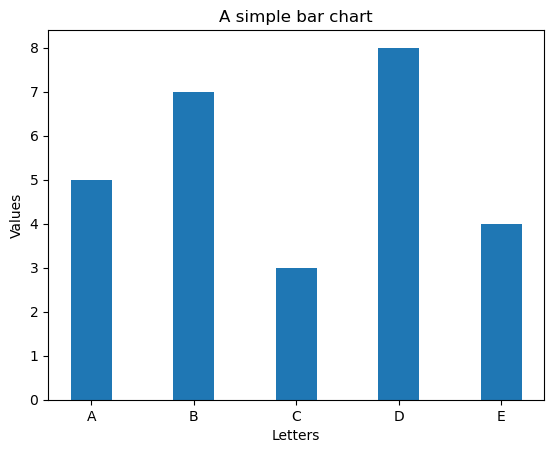

In [34]:
# Initialize
plt.figure()

categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 8, 4]

# Draw plot and axis labels
width = 0.4  # the width of the bars
plt.bar(categories, values, width=width)
plt.xlabel("Letters")
plt.ylabel("Values")
plt.title("A simple bar chart")

# Display
plt.show()

### Exercise 3

Re-create your bar plot from Exercise 2, but change the color of the bars, and change the font style for the titles and axis labels.

Hint: try setting `fontfamily = "serif"`

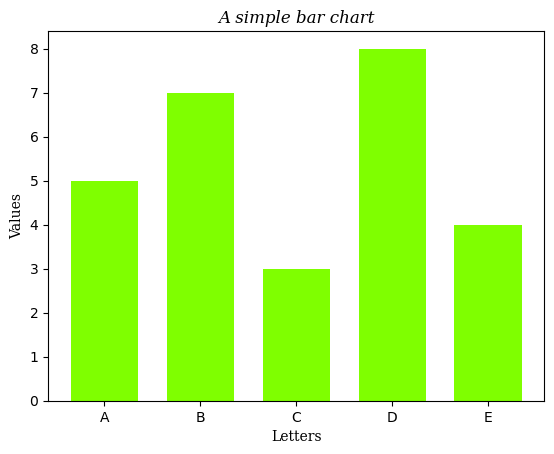

In [36]:
# Initialize
plt.figure()

categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 8, 4]

# Draw plot and axis labels
width = 0.7  # the width of the bars
plt.bar(categories, values, width=width, color="chartreuse")
plt.xlabel("Letters", fontfamily="serif")
plt.ylabel("Values", fontfamily="serif")
plt.title("A simple bar chart", fontfamily="serif", fontstyle="italic")

# Display
plt.show()

### Exercise 4 

Create a figure with 2 vertical subplots. The top subplot should be your plot from Exercise 1, and the bottom subplot should be your plot from Exercise 3.

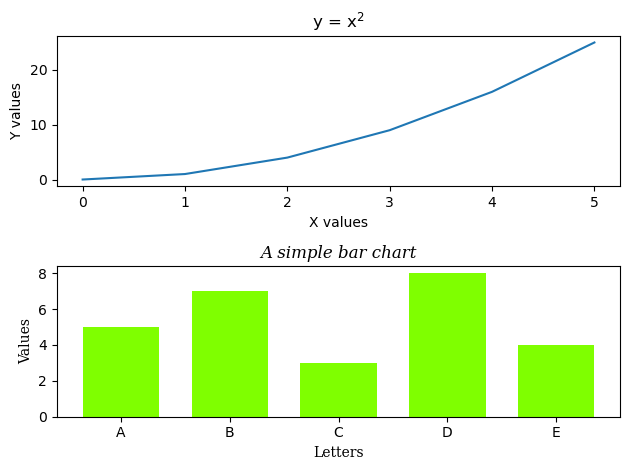

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1)

x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

# Draw plot and axis labels
ax1.plot(x, y)
ax1.set_ylabel("Y values")
ax1.set_xlabel("X values")
ax1.set_title(r"y = x$^2$")

categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 8, 4]

# Draw plot and axis labels
width = 0.7  # the width of the bars
ax2.bar(categories, values, width=width, color="chartreuse")
ax2.set_xlabel("Letters", fontfamily="serif")
ax2.set_ylabel("Values", fontfamily="serif")
ax2.set_title("A simple bar chart", fontfamily="serif", fontstyle="italic")

plt.tight_layout() # Magical function!

# Display
plt.show()